In [1]:
from nn import *
from loss import loss_mapper
from viz import plot_history
from metrics import accuracy
from callbacks import EarlyStopping
from tools import train_test_split, load, save, binary_encoder
from optim import MomentumGradientDescent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('resources/data.csv', index_col=0)

In [4]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [5]:
y, ohe_map = binary_encoder(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=.33, random_state=42)

In [7]:
ohe_map

{0: 'B', 1: 'M'}

In [8]:
X_normed = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

In [9]:
X_test_normed = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

In [10]:
model = NeuralNetwork(loss='binary_crossentropy', optimizer='gd', verbose=True, verbose_step=1)
model.add(Dense(30, 'relu'))
model.add(Dense(1, activation=Sigmoid()))

In [11]:
es = EarlyStopping(monitor='val_loss', patience=300)

[    1/10]: loss=0.68174 val_loss=0.68454 accuracy=0.63947 val_accuracy=0.60638 
[    2/10]: loss=0.67169 val_loss=0.67687 accuracy=0.63947 val_accuracy=0.60638 
[    3/10]: loss=0.66107 val_loss=0.66848 accuracy=0.63947 val_accuracy=0.60638 
[    4/10]: loss=0.64589 val_loss=0.65553 accuracy=0.63947 val_accuracy=0.60638 
[    5/10]: loss=0.61890 val_loss=0.63104 accuracy=0.64474 val_accuracy=0.61170 
[    6/10]: loss=0.56899 val_loss=0.58408 accuracy=0.72105 val_accuracy=0.67021 
[    7/10]: loss=0.48941 val_loss=0.50786 accuracy=0.87632 val_accuracy=0.83511 
[    8/10]: loss=0.39538 val_loss=0.41731 accuracy=0.94474 val_accuracy=0.90426 
[    9/10]: loss=0.31343 val_loss=0.33836 accuracy=0.95789 val_accuracy=0.92553 
[   10/10]: loss=0.25341 val_loss=0.28047 accuracy=0.96053 val_accuracy=0.92021 


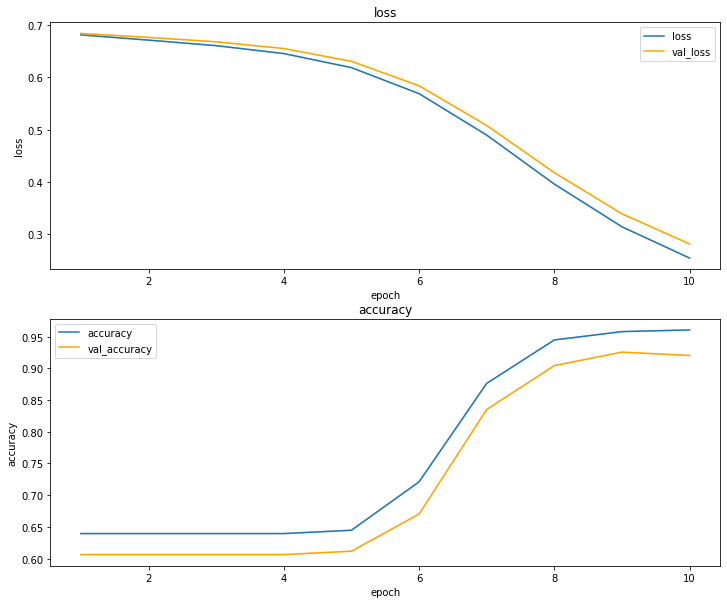

In [12]:
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=10, batch_size=32, callbacks=[], metrics=[accuracy], reinitialize=False)
plot_history(h)

[    1/10]: loss=0.07701 val_loss=0.13083 accuracy=0.97632 val_accuracy=0.94681 
[    2/10]: loss=0.05081 val_loss=0.10251 accuracy=0.97895 val_accuracy=0.96277 
[    3/10]: loss=0.04742 val_loss=0.11547 accuracy=0.97895 val_accuracy=0.95745 
[    4/10]: loss=0.04557 val_loss=0.13213 accuracy=0.97632 val_accuracy=0.95213 
[    5/10]: loss=0.03101 val_loss=0.09043 accuracy=0.98947 val_accuracy=0.96277 
[    6/10]: loss=0.02302 val_loss=0.09653 accuracy=0.99211 val_accuracy=0.96277 
[    7/10]: loss=0.02252 val_loss=0.15586 accuracy=0.99211 val_accuracy=0.94681 
[    8/10]: loss=0.04298 val_loss=0.42335 accuracy=0.99211 val_accuracy=0.94681 
[    9/10]: loss=0.01320 val_loss=0.24482 accuracy=0.99211 val_accuracy=0.94149 
[   10/10]: loss=0.00987 val_loss=0.23698 accuracy=0.99474 val_accuracy=0.95745 


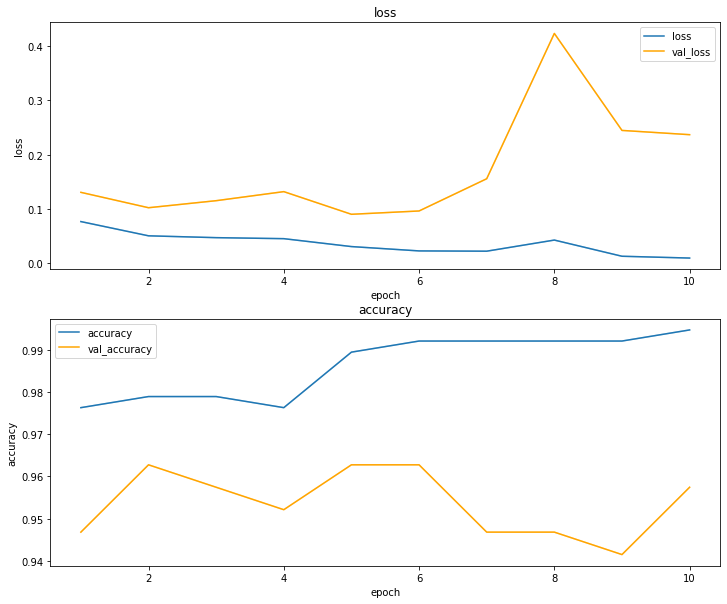

In [13]:
model = NeuralNetwork(loss='binary_crossentropy', optimizer='rmsprop', verbose=True, verbose_step=1)
model.add(Dense(30, 'relu'))
model.add(Dense(1, activation=Sigmoid()))
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=10, batch_size=32, callbacks=[], metrics=[accuracy], reinitialize=False)
plot_history(h)

[    1/10]: loss=0.10241 val_loss=0.18997 accuracy=0.97368 val_accuracy=0.94149 
[    2/10]: loss=0.10159 val_loss=0.14039 accuracy=0.97632 val_accuracy=0.97340 
[    3/10]: loss=0.05018 val_loss=0.13431 accuracy=0.97895 val_accuracy=0.96809 
[    4/10]: loss=0.03627 val_loss=0.12878 accuracy=0.98421 val_accuracy=0.96277 
[    5/10]: loss=0.03036 val_loss=0.12901 accuracy=0.98684 val_accuracy=0.97340 
[    6/10]: loss=0.02185 val_loss=0.14735 accuracy=0.99211 val_accuracy=0.96277 
[    7/10]: loss=0.01730 val_loss=0.15021 accuracy=0.99474 val_accuracy=0.96277 
[    8/10]: loss=0.01287 val_loss=0.15572 accuracy=0.99474 val_accuracy=0.96277 
[    9/10]: loss=0.00997 val_loss=0.15657 accuracy=0.99737 val_accuracy=0.96809 
[   10/10]: loss=0.00782 val_loss=0.15604 accuracy=0.99737 val_accuracy=0.97872 


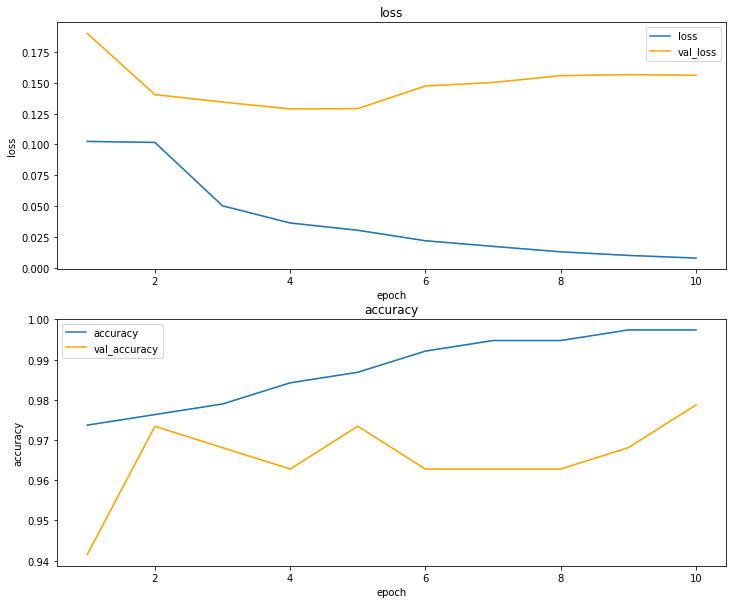

In [14]:
model = NeuralNetwork(loss='binary_crossentropy', optimizer='adam', verbose=True, verbose_step=1)
model.add(Dense(30, 'relu'))
model.add(Dense(1, activation=Sigmoid()))
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=10, batch_size=32, callbacks=[], metrics=[accuracy], reinitialize=False)
plot_history(h)

[    1/10]: loss=0.58499 val_loss=0.59025 accuracy=0.94474 val_accuracy=0.93617 
[    2/10]: loss=0.32608 val_loss=0.34430 accuracy=0.94474 val_accuracy=0.92021 
[    3/10]: loss=0.18529 val_loss=0.21288 accuracy=0.94737 val_accuracy=0.93085 
[    4/10]: loss=0.12342 val_loss=0.15298 accuracy=0.95789 val_accuracy=0.94681 
[    5/10]: loss=0.09493 val_loss=0.12266 accuracy=0.96842 val_accuracy=0.95213 
[    6/10]: loss=0.08089 val_loss=0.10750 accuracy=0.97368 val_accuracy=0.95213 
[    7/10]: loss=0.07523 val_loss=0.10434 accuracy=0.97632 val_accuracy=0.96277 
[    8/10]: loss=0.07467 val_loss=0.11318 accuracy=0.97632 val_accuracy=0.96809 
[    9/10]: loss=0.07569 val_loss=0.12771 accuracy=0.97368 val_accuracy=0.96809 
[   10/10]: loss=0.07525 val_loss=0.14042 accuracy=0.97632 val_accuracy=0.96277 


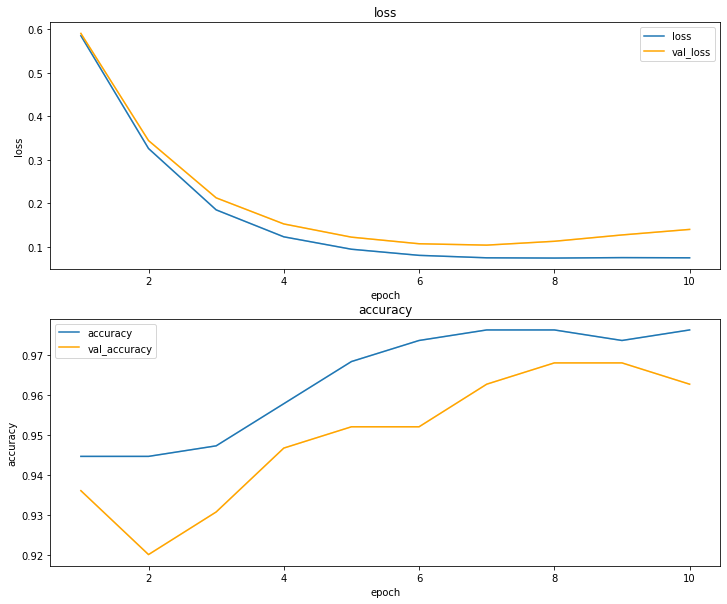

In [15]:
model = NeuralNetwork(loss='binary_crossentropy', optimizer='adam', verbose=True, verbose_step=1)
model.add(Dense(30, 'relu'))
model.add(Dense(1, activation=Sigmoid()))
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=10, callbacks=[], metrics=[accuracy], reinitialize=False)
plot_history(h)